In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd "/content/drive/My Drive/cyclevae2"

/content/drive/My Drive/cyclevae2


In [4]:
!git clone https://github.com/hpjang/VAE_experiment.git

Cloning into 'VAE_experiment'...
remote: Enumerating objects: 231, done.
remote: Counting objects: 100% (111/111), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 231 (delta 64), reused 102 (delta 57), pack-reused 120
Receiving objects: 100% (231/231), 93.77 KiB | 4.69 MiB/s, done.
Resolving deltas: 100% (111/111), done.


In [5]:
!pip install virtualenv

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.9/468.9 kB 47.5 MB/s eta 0:00:00


In [9]:
!pip3 install torch pyworld pysptk h5py numpy kaldi-io librosa scipy scikit-learn fastdtw

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 7.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 421.3/421.3 kB 34.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 18.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using

In [11]:
cd "/content/drive/My Drive/cyclevae2/VAE_experiment"

/content/drive/My Drive/cyclevae2/VAE_experiment


In [27]:
!python3 preprocess/preprocess-vcc2018.py

Loading VCC2SF1 Wavs...
Processing 10017
Processing 10046
Processing 10001
Processing 10019
Processing 10043
Processing 10005
Processing 10073
Processing 10029
Processing 10009
Processing 10006
Processing 10018
Processing 10034
Processing 10035
Processing 10027
Processing 10060
Processing 10074
Processing 10050
Processing 10079
Processing 10065
Processing 10012
Processing 10037
Processing 10014
Processing 10061
Processing 10053
Processing 10056
Processing 10044
Processing 10011
Processing 10058
Processing 10004
Processing 10064
Processing 10068
Processing 10059
Processing 10010
Processing 10032
Processing 10071
Processing 10021
Processing 10076
Processing 10023
Processing 10072
Processing 10038
Processing 10049
Processing 10047
Processing 10030
Processing 10013
Processing 10081
Processing 10008
Processing 10048
Processing 10024
Processing 10003
Processing 10040
Processing 10062
Processing 10022
Processing 10067
Processing 10016
Processing 10057
Processing 10052
Processing 10077
Process

In [15]:
!pip install torch --upgrade

In [20]:
import torch

torch.backends.cudnn.benchmark = True

In [25]:
!pip install pydub
!apt-get install ffmpeg

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [28]:
!bash run_all.sh > vae_exp_0520.txt

/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
/usr/local/lib/python3.10/dist-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass
Traceback (most recent call last):
  File "/content/drive/MyDrive/cyclevae2/VAE_experiment/train_further.py", line 493, in <module>
    A2B_z_mu, A2B_z_logvar, A2B_z = Enc(A2B, B_y)
  

In [44]:
!bash run_graph\ \(1\).sh
#!bash run_graph.sh

In [77]:
import pandas as pd

df=pd.read_csv('/content/drive/My Drive/cyclevae2/VAE_experiment/graph/VAE3.csv')
df.reset_index(inplace=True)
df.rename(columns={'index': 'epoch', 'epoch': 'Train', 'Train': 'Dev', 'Dev': 'nan'}, inplace=True)
df = df.drop(columns=['nan'])

In [78]:
df

,epoch,Train,Dev
0,0,1.6135,1.4828
1,1,1.4756,1.4354
2,2,1.4305,1.4127
3,3,1.3944,1.3782
4,4,1.3676,1.3713
...,...,...,...
996,996,1.1637,1.1865
997,997,1.1637,1.1809
998,998,1.1569,1.1850
999,999,1.1596,1.1812


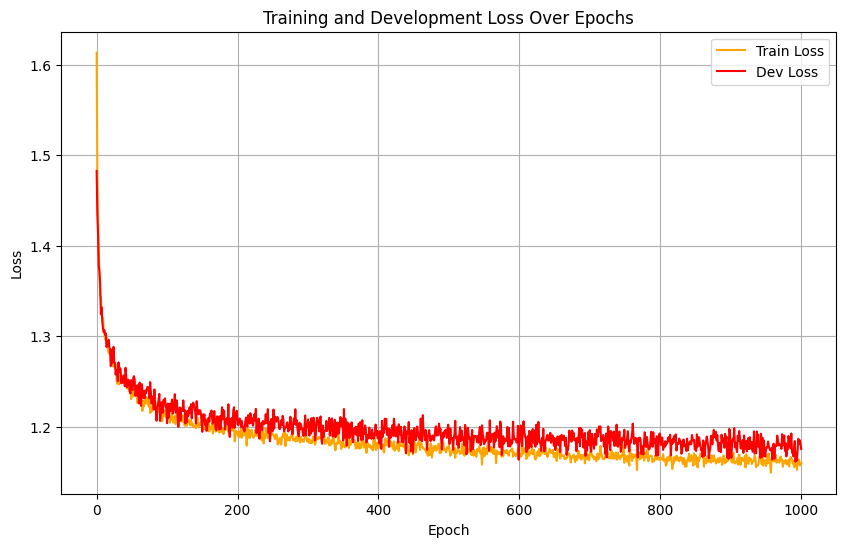

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['epoch'], df['Train'], label='Train Loss', color='orange')
plt.plot(df['epoch'], df['Dev'], label='Dev Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Development Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()